In [1]:
#step 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [1496]:
#step 2

In [7]:
data = pd.read_csv('clean_data.csv')

In [8]:
print("First 5 rows of the DataFrame:" + "\n")
print(data.head())

First 5 rows of the DataFrame:

             id       screen_name                   location  \
0  8.160000e+17  "HoustonPokeMap"              "Houston, TX"   
1  4.843621e+09         kernyeahx  Templeville town, MD, USA   
2  4.303727e+09   mattlieberisbot                        NaN   
3  3.063139e+09         sc_papers                        NaN   
4  2.955142e+09      lucarivera16      Dublin, United States   

                                         description  \
0  "Rare and strong PokŽmon in Houston, TX. See m...   
1  From late 2014 Socium Marketplace will make sh...   
2  Inspired by the smart, funny folks at @replyal...   
3                                                NaN   
4             Inspiring cooks everywhere since 1956.   

                         url  followers_count  friends_count  listed_count  \
0  "https://t.co/dnWuDbFRkt"             1291              0            10   
1                        NaN                1            349             0   
2    https:/

In [9]:
print("Number of rows in our data set is: ")
print(data.shape[0])
print("Number of columns in our columns: ")
print(data.shape[1])

Number of rows in our data set is: 
2672
Number of columns in our columns: 
18


In [10]:
print(data.isnull().sum()) #finds all the null values
print(data.shape)

id                          0
screen_name                 0
location                  963
description               387
url                      1347
followers_count             0
friends_count               0
listed_count                0
created_at                  0
favourites_count            0
verified                    0
statuses_count              0
lang                        0
status                    325
default_profile             0
default_profile_image       0
name                        0
bot                         0
dtype: int64
(2672, 18)


In [11]:
#step 3

In [12]:
print("There are 2672 rows in our data set. The ones with more than 35% null values are location and url")
print("These values hinder more than help our data set. I shall drop them from our data processing")

There are 2672 rows in our data set. The ones with more than 35% null values are location and url
These values hinder more than help our data set. I shall drop them from our data processing


In [13]:
data.dropna(thresh = 0.65*data.shape[0], axis = 1, inplace = True) #drops columns instead of rows

In [14]:
print(data) #prints an easier to read version of our dataset

                id       screen_name  \
0     8.160000e+17  "HoustonPokeMap"   
1     4.843621e+09         kernyeahx   
2     4.303727e+09   mattlieberisbot   
3     3.063139e+09         sc_papers   
4     2.955142e+09      lucarivera16   
...            ...               ...   
2667  2.362091e+08     leslieberland   
2668  2.545039e+08      SamuelsPants   
2669  1.548544e+07       jimmyfallon   
2670  7.513869e+08    LocalAlligator   
2671  1.992936e+07      RepJoeBarton   

                                            description  followers_count  \
0     "Rare and strong PokŽmon in Houston, TX. See m...             1291   
1     From late 2014 Socium Marketplace will make sh...                1   
2     Inspired by the smart, funny folks at @replyal...             1086   
3                                                   NaN               33   
4                Inspiring cooks everywhere since 1956.               11   
...                                                 ...        

In [15]:
#step 4

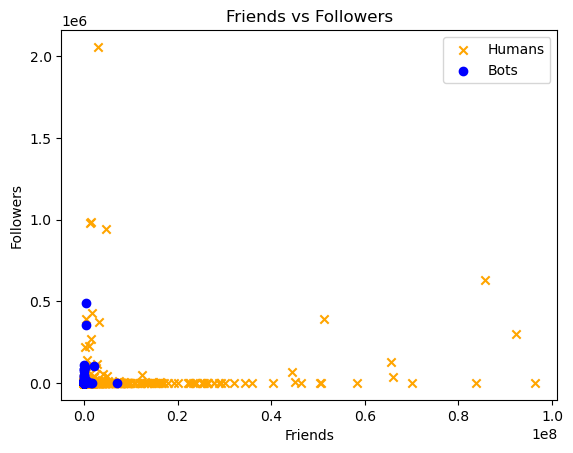

In [16]:
fr_bots = []
fl_bots = []
fr_norm = []
fl_norm = []

for i in range(2672):
    if(data.iat[i, 15] == 1):
        fr_bots.append(data.iat[i, 3])
        fl_bots.append(data.iat[i, 4])
    else:
        fr_norm.append(data.iat[i, 3])
        fl_norm.append(data.iat[i, 4])

        
plt.scatter(fr_norm, fl_norm, label = 'Humans', color = 'orange', marker = 'x')
plt.scatter(fr_bots, fl_bots, label = 'Bots', color = 'blue', marker = 'o')
plt.xlabel('Friends')
plt.ylabel('Followers')
plt.title('Friends vs Followers')

plt.legend()
plt.show()

In [17]:
#stupid thing I had to do to ensure every null element is empty so it doesn't throw errors
for i in range(2672):
    if(data.iat[i, 1] == np.NaN):
        data.iat[i, 1] = ""
    if(data.iat[i, 14] == np.NaN):
        data.iat[i, 14] = ""
    if(data.iat[i, 2] == np.NaN):
        data.iat[i, 2] = ""
    if(data.iat[i, 11] == np.NaN):
        data.iat[i, 11] = ""

In [18]:
#step 5

In [19]:
screen_name_b = [False]*2672
name_b = [False]*2672
description_b = [False]*2672
status_b = [False]*2672

In [20]:
words = ["bot", "follow me", "free", "fake", "virus", "troll", "clone", "tweet me"]

for i in range(2672):
    for j in range(8):
        if words[j] in (data.iat[i, 1].lower()): #screenname
            screen_name_b[i] = True
        if words[j] in (data.iat[i, 14].lower()): #name
            name_b[i] = True
        if words[j] in (str(data.iat[i, 2]).lower()): #description
            description_b[i] = True
        if words[j] in (str(data.iat[i, 11]).lower()): #status
            status_b[i] = True  

In [21]:
# for i in range(2672):
#     for testing purposes
#     print("screename: " + data.iat[i, 1])
#     print("name: " + data.iat[i, 14])
#     print("description: " + str(data.iat[i, 2]))
#     print("status: " + str(data.iat[i, 12]))

In [22]:
#now that we have our lists, we can make a column, where each cell in a row corresponds to an index in its respective column 

In [23]:
#added empty columns
data['screen_name_binary'] = None
data['name_binary'] = None
data['description_binary'] = None
data['status_binary'] = None

In [24]:
for i in range(2672):
    data.iat[i, 16] = screen_name_b[i]
    data.iat[i, 17] = name_b[i]
    data.iat[i, 18] = description_b[i]
    data.iat[i, 19] = status_b[i]
    
#print(data)

In [25]:
#part 6

In [26]:
selected_features = ['friends_count', 'bot', 'followers_count', 'screen_name_binary', 'name_binary', 'status_binary', 'verified', 'statuses_count']
data_subset = data[selected_features]

#features that are inputs:
# friends_count, followers_count, verified screen_name_binary, name_binary, status_binary, status_count
#features that are output(s): bot

In [27]:
#step 6, part 3
X = data_subset[['friends_count', 'verified', 'followers_count', 'screen_name_binary', 'name_binary', 'status_binary', 'statuses_count']]
y = data_subset['bot']

In [28]:
#step 6, part 4
#split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [29]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [30]:
from sklearn.metrics import accuracy_score

train_pred = clf.predict(X_train)
print("Training accuracy: ", accuracy_score(y_train, train_pred))

test_pred = clf.predict(X_test)
print("Test accuracy: ", accuracy_score(y_test, test_pred))

Training accuracy:  0.9994652406417113
Test accuracy:  0.8553615960099751
